# Naive Bayes Classifier

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


stop_words = stopwords.words()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\44758\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\44758\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#import the data
df = pd.read_csv('Naive Bayes.csv')

In [5]:
df

ID     location                                             review  \
0        1  Syambhunath  It is at the top of valleys mountain.  Best pl...   
1        2  Syambhunath  This place has a significant importance in Bud...   
2        3  Syambhunath  Visited this from the other side on a rainy ev...   
3        4  Syambhunath  A beautiful temple situated in the capital wit...   
4        5  Syambhunath  great, beautiful, historic & religious place.....   
...    ...          ...                                                ...   
7097  7267      Pokhara  It's a nice place to sit back, and enjoy. The ...   
7098  7268      Pokhara        Excellent Place to visit, Lifetime memories   
7099  7269      Pokhara  It's very photogenic and relaxing when there a...   
7100  7270      Pokhara  U can get real definition of nature's beauty a...   
7101  7271      Pokhara               Best. Walking please beautiful views   

      sentiment  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
7097          1  
7098          1  
7099          1  
7100          1  
7101          1  

[7102 rows x 4 columns]

In [6]:
#If-else condition to filter the sentiment 

conditions = [
    (df['sentiment']== 1),
    (df['sentiment']== 0),
    (df['sentiment']==-1)]
values = ['positive', 'neutral', 'negative']
df['sentiment']= np.select(conditions, values)

In [7]:
df.head(50)

ID     location                                             review  \
0    1  Syambhunath  It is at the top of valleys mountain.  Best pl...   
1    2  Syambhunath  This place has a significant importance in Bud...   
2    3  Syambhunath  Visited this from the other side on a rainy ev...   
3    4  Syambhunath  A beautiful temple situated in the capital wit...   
4    5  Syambhunath  great, beautiful, historic & religious place.....   
5    6  Syambhunath  The view is so pleased and pleasures that it t...   
6    7  Syambhunath  It is a must visit heritage site in kathmandu....   
7    8  Syambhunath  The Swayambhunath Stupa is one of the crowning...   
8    9  Syambhunath  It’s up there but would definitely recommend d...   
9   10  Syambhunath  One of the best stupa in Kathmandu. Its locate...   
10  11  Syambhunath  Vintage Place Of Lord Buddha\nFamous For it's ...   
11  12  Syambhunath  Swayambhu, meaning self-sprung, is one of the ...   
12  13  Syambhunath  Surreal experience. Remember to put your sunsc...   
13  14  Syambhunath  The oldest religious site in Kathmandu. Worth ...   
14  15  Syambhunath  All you get from visiting this place is the se...   
15  16  Syambhunath  This temple is also known as the Monkey Temple...   
16  17  Syambhunath  The monkey temple is a good tourist spot. You ...   
17  18  Syambhunath  One of the best places to visit in kathmandu, ...   
18  19  Syambhunath  Swayambhunath is a glorious ancient religious ...   
19  20  Syambhunath  It's beautiful temple located at the hilltop f...   
20  21  Syambhunath  Swayambhunath is also known as Shiva( god Maha...   
21  22  Syambhunath  Swayambhunath is also known as Shiva( god Maha...   
22  23  Syambhunath  Swayambunath also known as the monkey temple i...   
23  24  Syambhunath  Swayanbhu Mahachaitya is an important landmark...   
24  25  Syambhunath  A sacred and holy place of worship for Hindus ...   
25  26  Syambhunath  It's a most to visit tourism sites in kathmand...   
26  27  Syambhunath  Extraordinary ambition with Vibe of Bhuda fill...   
27  28  Syambhunath  A beautiful place to spend your day at.\n\nMon...   
28  29  Syambhunath  Must visit for locals and tourists. Recommend ...   
29  30  Syambhunath  I had been into this place for an official cau...   
30  31  Syambhunath  Be ready to climb 300 steps to reach this loca...   
31  32  Syambhunath  This place has been in my wishlist from a long...   
32  33  Syambhunath  Amazing experience. A stupa of Fantastic archi...   
33  34  Syambhunath  Only WoW,\n• Great View can see Whole city fro...   
34  35  Syambhunath  I would rate this place as okay .\n\nLet's sta...   
35  36  Syambhunath  Here’s something for the non-religious folk, y...   
36  37  Syambhunath  Popularly known as monkey temple.\n\nSwayambhu...   
37  38  Syambhunath  It is an ancient, religious architecture locat...   
38  39  Syambhunath  Located at swayambhu chowk. It's also a temple...   
39  40  Syambhunath  A place on the height. You can have stairs or ...   
40  41  Syambhunath  Resting on a hillock 3 km west of Kathmandu, S...   
41  42  Syambhunath  From main road you can walk for the entrance w...   
42  43  Syambhunath  Swayambhu (Devanagari: स्वयम्भू स्तूप; Nepal B...   
43  44  Syambhunath  It is the most sacred amoung Buddhist pilgrima...   
44  45  Syambhunath  It is a peaceful place to be. You will get to ...   
45  46  Syambhunath  Best place to Enjoy Beautiful Art stunning vie...   
46  47  Syambhunath  My friend and I decided to stay for one night ...   
47  48  Syambhunath  This #stupa is the oldest of its kind in Nepal...   
48  49  Syambhunath  Religious place  🙏🙏\nAwesome view of Kathmandu...   
49  50  Syambhunath  Perched on top of the Semgu Hill located in th...   

   sentiment  
0   positive  
1   positive  
2   positive  
3   positive  
4   positive  
5   positive  
6   positive  
7   positive  
8   positive  
9   positive  
10   neutral  
11  positive  
12   neutral  
13  positive  
14  

In [8]:
df['sentiment'].value_counts()

positive    5187
neutral     1701
negative     214
Name: sentiment, dtype: int64

In [9]:
fig,(ax1,ax2,ax3)=plt.subplots(all, figsize=(12,8))
ax1.hist(df[df['sentiment']=='positive']['review'].str.len())
ax1.set_title( 'Positive Reviews')
ax2.hist(df[df['sentiment']=='negative']['review'].str.len())
ax2.set_title( 'Negative Reviews')
ax3.hist(df[df['sentiment']=='neutral'] ['review'].str.len())
ax3.set_title('Neutral Reviews')

ValueError: Number of rows must be a positive integer, not <built-in function all>

<Figure size 864x576 with 0 Axes>

The histogram shows that review range from 10 to 14000 characters and generally, it is between 10 to 1500 characters.

Text(0.5, 1.0, 'Negative Reviews')

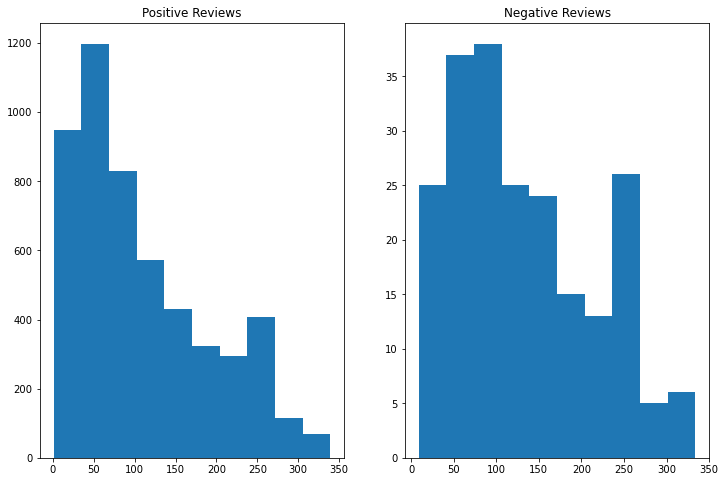

In [10]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.hist(df[df['sentiment']=='positive']['review'].str.len())
ax1.set_title( 'Positive Reviews')
ax2.hist(df[df['sentiment']=='negative']['review'].str.len())
ax2.set_title( 'Negative Reviews')

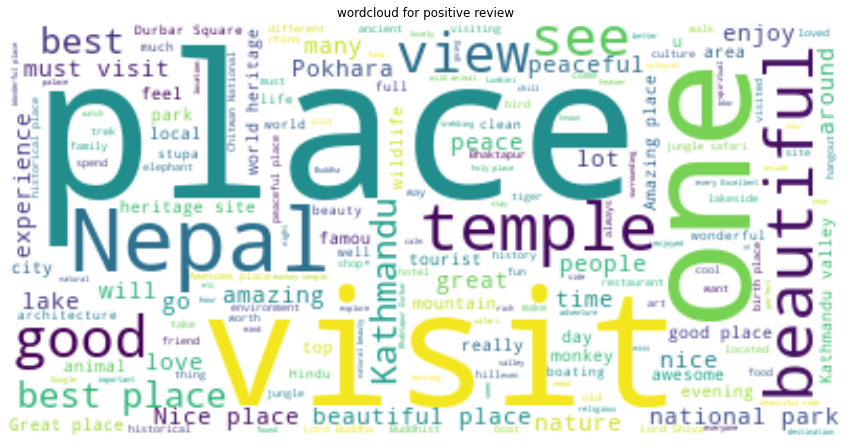

In [11]:
text = " ".join(i for i in df[df['sentiment']=='positive']['review'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

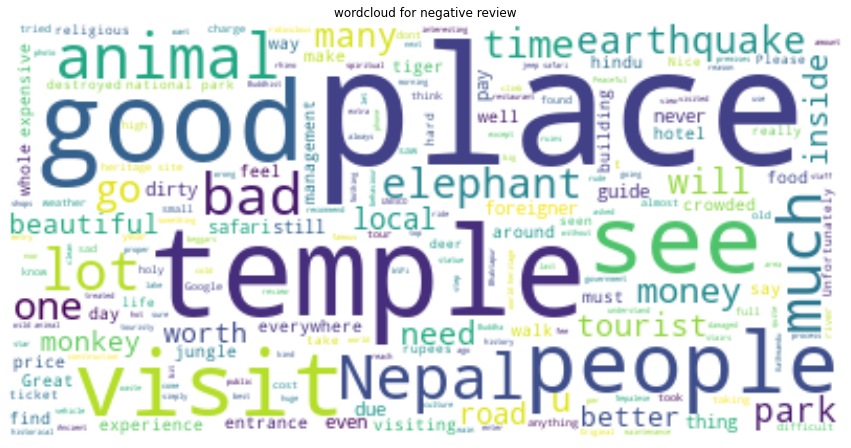

In [12]:
text = " ".join(i for i in df[df['sentiment']=='negative']['review'])
#stopwords = set(STOPWORDS)
wordcloud = WordCloud( background_color="white").generate(text)
#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for negative review')
plt.show()

The wordcloud graphs are not exactly meaningful result. So let's do text preprocessing now.

In [13]:
df.rename(columns={'review':'text'}, inplace = True)
df

ID     location                                               text  \
0        1  Syambhunath  It is at the top of valleys mountain.  Best pl...   
1        2  Syambhunath  This place has a significant importance in Bud...   
2        3  Syambhunath  Visited this from the other side on a rainy ev...   
3        4  Syambhunath  A beautiful temple situated in the capital wit...   
4        5  Syambhunath  great, beautiful, historic & religious place.....   
...    ...          ...                                                ...   
7097  7267      Pokhara  It's a nice place to sit back, and enjoy. The ...   
7098  7268      Pokhara        Excellent Place to visit, Lifetime memories   
7099  7269      Pokhara  It's very photogenic and relaxing when there a...   
7100  7270      Pokhara  U can get real definition of nature's beauty a...   
7101  7271      Pokhara               Best. Walking please beautiful views   

     sentiment  
0     positive  
1     positive  
2     positive  
3     positive  
4     positive  
...        ...  
7097  positive  
7098  positive  
7099  positive  
7100  positive  
7101  positive  

[7102 rows x 4 columns]

In [14]:
def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number 
    text = re.sub('<.*?>+', '', text) # removing special characters, 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)
   
    #removing emoji: 
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)   

   # removing short form: 
    
    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)
    
     
    return text
    
dt = df['text'].apply(cleaning)

In [15]:
df['sentiment']

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
7097    positive
7098    positive
7099    positive
7100    positive
7101    positive
Name: sentiment, Length: 7102, dtype: object

In [16]:
dt = pd.DataFrame(dt)  
dt['sentiment']=df['sentiment']
dt

text sentiment
0     it is at the top of valleys mountain  best pla...  positive
1     this place has a significant importance in bud...  positive
2     visited this from the other side on a rainy ev...  positive
3     a beautiful temple situated in the capital wit...  positive
4     great beautiful historic  religious placecrowd...  positive
...                                                 ...       ...
7097  its a nice place to sit back and enjoy the cal...  positive
7098         excellent place to visit lifetime memories  positive
7099  its very photogenic and relaxing when there ar...  positive
7100  u can get real definition of natures beauty an...  positive
7101                best walking please beautiful views  positive

[7102 rows x 2 columns]

In [17]:
# remove stop word: 
dt['no_sw'] = dt['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [18]:
dt

text sentiment  \
0     it is at the top of valleys mountain  best pla...  positive   
1     this place has a significant importance in bud...  positive   
2     visited this from the other side on a rainy ev...  positive   
3     a beautiful temple situated in the capital wit...  positive   
4     great beautiful historic  religious placecrowd...  positive   
...                                                 ...       ...   
7097  its a nice place to sit back and enjoy the cal...  positive   
7098         excellent place to visit lifetime memories  positive   
7099  its very photogenic and relaxing when there ar...  positive   
7100  u can get real definition of natures beauty an...  positive   
7101                best walking please beautiful views  positive   

                                                  no_sw  
0     top valleys mountain place pleasure love place...  
1     place significant importance buddhism visited ...  
2     visited side rainy evening visit temple view g...  
3     beautiful temple situated capital stunning vie...  
4     great beautiful historic religious placecrowde...  
...                                                 ...  
7097  nice place back enjoy calm fresh air lake espe...  
7098            excellent place visit lifetime memories  
7099                                photogenic relaxing  
7100               real definition natures beauty peace  
7101                            walking beautiful views  

[7102 rows x 3 columns]

In [19]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in dt["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(50))
temp.columns=['word', 'count']
temp

word  count
0           place   3932
1           visit   1312
2          temple   1218
3       beautiful   1062
4           nepal    981
5       kathmandu    783
6            park    624
7            nice    575
8           great    553
9           world    538
10        amazing    522
11       national    509
12           view    501
13       heritage    481
14           site    422
15           lake    412
16           time    391
17           lord    388
18         buddha    384
19       peaceful    340
20     experience    324
21         valley    318
22     historical    298
23      bhaktapur    297
24           city    296
25          peace    286
26         safari    284
27        awesome    272
28           area    267
29          hindu    259
30          enjoy    257
31         nature    252
32         square    250
33           love    249
34        animals    246
35      religious    244
36         jungle    236
37        temples    236
38          birth    234
39        pokhara    232
40        ancient    225
41         durbar    222
42           life    198
43         famous    197
44        chitwan    196
45         places    193
46           lots    190
47        located    190
48         beauty    187
49  pashupatinath    183

In [20]:
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h', 
             width=700, height=700)

In [21]:
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
dt["wo_stopfreq"] = dt["no_sw"].apply(lambda text: remove_freqwords(text))
dt.head()

text sentiment  \
0  it is at the top of valleys mountain  best pla...  positive   
1  this place has a significant importance in bud...  positive   
2  visited this from the other side on a rainy ev...  positive   
3  a beautiful temple situated in the capital wit...  positive   
4  great beautiful historic  religious placecrowd...  positive   

                                               no_sw  \
0  top valleys mountain place pleasure love place...   
1  place significant importance buddhism visited ...   
2  visited side rainy evening visit temple view g...   
3  beautiful temple situated capital stunning vie...   
4  great beautiful historic religious placecrowde...   

                                         wo_stopfreq  
0  top valleys mountain pleasure love valley life...  
1  significant importance buddhism visited sunset...  
2  visited side rainy evening view crowdy obvious...  
3  situated capital stunning vies city insight am...  
4  historic religious placecrowded visitors world...

In [22]:
dt['no_sw'].loc[5]

'view pleased pleasures touches directly soulgreat place visit kathmandu nepali recommend visit place 4pm evening'

In [23]:
dt['wo_stopfreq'].loc[5]

'view pleased pleasures touches directly soulgreat nepali recommend 4pm evening'

In [24]:
# Lemmatization: Lemmatization is converting the word to its base form or lemma by removing affixes from the inflected words. 
# It helps to create better features for machine learning and NLP models hence it is an important preprocessing step.


wordnet_lem = WordNetLemmatizer()

dt['wo_stopfreq_lem'] = dt['wo_stopfreq'].apply(wordnet_lem.lemmatize)
dt

text sentiment  \
0     it is at the top of valleys mountain  best pla...  positive   
1     this place has a significant importance in bud...  positive   
2     visited this from the other side on a rainy ev...  positive   
3     a beautiful temple situated in the capital wit...  positive   
4     great beautiful historic  religious placecrowd...  positive   
...                                                 ...       ...   
7097  its a nice place to sit back and enjoy the cal...  positive   
7098         excellent place to visit lifetime memories  positive   
7099  its very photogenic and relaxing when there ar...  positive   
7100  u can get real definition of natures beauty an...  positive   
7101                best walking please beautiful views  positive   

                                                  no_sw  \
0     top valleys mountain place pleasure love place...   
1     place significant importance buddhism visited ...   
2     visited side rainy evening visit temple view g...   
3     beautiful temple situated capital stunning vie...   
4     great beautiful historic religious placecrowde...   
...                                                 ...   
7097  nice place back enjoy calm fresh air lake espe...   
7098            excellent place visit lifetime memories   
7099                                photogenic relaxing   
7100               real definition natures beauty peace   
7101                            walking beautiful views   

                                            wo_stopfreq  \
0     top valleys mountain pleasure love valley life...   
1     significant importance buddhism visited sunset...   
2     visited side rainy evening view crowdy obvious...   
3     situated capital stunning vies city insight am...   
4     historic religious placecrowded visitors world...   
...                                                 ...   
7097  back enjoy calm fresh air lake especially nigh...   
7098                        excellent lifetime memories   
7099                                photogenic relaxing   
7100               real definition natures beauty peace   
7101                                      walking views   

                                        wo_stopfreq_lem  
0     top valleys mountain pleasure love valley life...  
1     significant importance buddhism visited sunset...  
2     visited side rainy evening view crowdy obvious...  
3     situated capital stunning vies city insight am...  
4     historic religious placecrowded visitors world...  
...                                                 ...  
7097  back enjoy calm fresh air lake especially nigh...  
7098                        excellent lifetime memories  
7099                                photogenic relaxing  
7100               real definition natures beauty peace  
7101                                      walking views  

[7102 rows x 5 columns]

**tokenization**


In [37]:
# create the cleaned data for the train-test split:
nb=dt.drop(columns=['text','no_sw', 'wo_stopfreq'])
nb.columns=['sentiment','review']
nb.sentiment = [0 if each == "negative" else 1 for each in nb.sentiment]


In [26]:
tokenized_review=nb['review'].apply(lambda x: x.split())
tokenized_review.head(5)

0    [top, valleys, mountain, pleasure, love, valle...
1    [significant, importance, buddhism, visited, s...
2    [visited, side, rainy, evening, view, crowdy, ...
3    [situated, capital, stunning, vies, city, insi...
4    [historic, religious, placecrowded, visitors, ...
Name: review, dtype: object

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(nb['review'])

**Train-test split**

In [154]:
from sklearn.model_selection import train_test_split
X=text_counts
y=nb['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

**Naive Bayes Modelling**

In [155]:
#complement NB model
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))


ComplementNB model accuracy is 87.33%
------------------------------------------------
Confusion Matrix:
     0     1
0   23    17
1  163  1218
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.57      0.20        40
           1       0.99      0.88      0.93      1381

    accuracy                           0.87      1421
   macro avg       0.55      0.73      0.57      1421
weighted avg       0.96      0.87      0.91      1421



In [156]:
#Multinominal NB Model
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 96.06%
------------------------------------------------
Confusion Matrix:
    0     1
0   8    32
1  24  1357
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.20      0.22        40
           1       0.98      0.98      0.98      1381

    accuracy                           0.96      1421
   macro avg       0.61      0.59      0.60      1421
weighted avg       0.96      0.96      0.96      1421



In [157]:
#Bernoulli NB Model
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

BernoulliNB model accuracy = 97.26%
------------------------------------------------
Confusion Matrix:
   0     1
0  1    39
1  0  1381
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.05        40
           1       0.97      1.00      0.99      1381

    accuracy                           0.97      1421
   macro avg       0.99      0.51      0.52      1421
weighted avg       0.97      0.97      0.96      1421



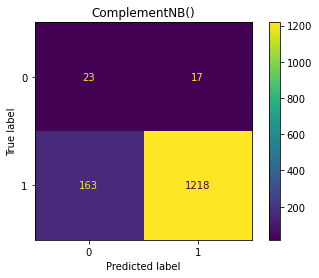

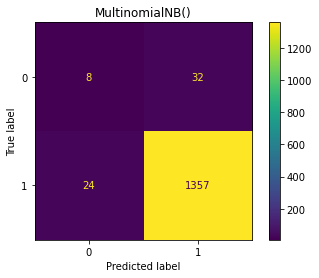

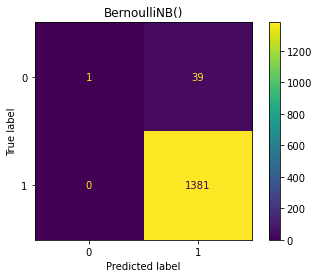

In [158]:
#plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
k= [CNB, MNB, BNB]
for i in k: 
    plot_confusion_matrix(i, X_test, y_test)  
    plt.title(i)
    plt.show()

0.8021994931209268 0.8021994931209269 0.6810101375814627


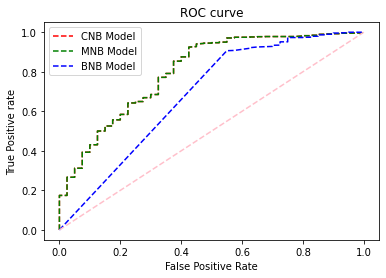

In [159]:
from sklearn.metrics import roc_curve

# predict probabilities for CNB, MNB, BNB models: 
CNB_prob = CNB.predict_proba(X_test)
MNB_prob = MNB.predict_proba(X_test)
BNB_prob = BNB.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, CNB_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, MNB_prob[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, BNB_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# auc scores
from sklearn.metrics import roc_auc_score
auc_CNB = roc_auc_score(y_test, CNB_prob[:,1])
auc_MNB = roc_auc_score(y_test, MNB_prob[:,1])
auc_BNB = roc_auc_score(y_test, BNB_prob[:,1])
print(auc_CNB, auc_MNB,auc_BNB)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='CNB Model')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='MNB Model')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='BNB Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();